# Transform Datetime format

In [15]:
# Load the CSV file into a DataFrame
file_path = 'temperature.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Group by the Automatic Weather Station and count the number of records for each station
record_counts = df.groupby(df.iloc[:, 1]).size().reset_index(name='Record Count')

# Display the result
print("\nNumber of Records for Each Automatic Weather Station:")
print(record_counts)


Number of Records for Each Automatic Weather Station:
     Automatic Weather Station  Record Count
0                 Chek Lap Kok         61059
1                  Cheung Chau         61059
2              Clear Water Bay         61059
3               HK Observatory         61059
4                      HK Park         61059
5                 Happy Valley         61059
6          Kai Tak Runway Park         61059
7                 Kau Sai Chau         61059
8                  King's Park         61059
9                 Kowloon City         61059
10                   Kwun Tong         61059
11                Lau Fau Shan         61059
12                  Ngong Ping         61059
13               Pak Tam Chung         61059
14                   Peng Chau         61059
15                    Sai Kung         61059
16                     Sha Tin         61059
17                Sham Shui Po         61059
18                Shau Kei Wan         61059
19                   Shek Kong         61059


In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'temperature.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert the first column to datetime and format it
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d%H%M').dt.strftime('%Y-%m-%d %H:%M:%S')

# Save the updated DataFrame back to the original CSV file
df.to_csv(file_path, index=False)

# Optionally, print the first few rows to verify the changes
print("\nUpdated Data:")
print(df.head())

C:\Users\cooki\AppData\Local\Temp\ipykernel_27660\1431714450.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0          2023-12-31 23:50:00
1          2023-12-31 23:50:00
2          2023-12-31 23:50:00
3          2023-12-31 23:50:00
4          2023-12-31 23:50:00
                  ...         
2381296    2025-02-28 18:30:00
2381297    2025-02-28 18:30:00
2381298    2025-02-28 18:30:00
2381299    2025-02-28 18:30:00
2381300    2025-02-28 18:30:00
Name: Date time, Length: 2381301, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d%H%M').dt.strftime('%Y-%m-%d %H:%M:%S')



Updated Data:
             Date time Automatic Weather Station  \
0  2023-12-31 23:50:00              Chek Lap Kok   
1  2023-12-31 23:50:00               Cheung Chau   
2  2023-12-31 23:50:00           Clear Water Bay   
3  2023-12-31 23:50:00              Happy Valley   
4  2023-12-31 23:50:00            HK Observatory   

  Maximum Air Temperature Since Midnight(degree Celsius)  \
0                                               24.6       
1                                               26.1       
2                                               23.6       
3                                               28.5       
4                                               25.7       

  Minimum Air Temperature Since Midnight(degree Celsius)  
0                                               18.3      
1                                               17.2      
2                                               17.6      
3                                               17.1      
4               

# Missing Values

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'averaged_temperature.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count null values for Max Temp by Automatic Water Station
max_temp_null_counts = df[df["Average Max Temp"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Max Temp Null Count')

# Count null values for Min Temp by Automatic Water Station
min_temp_null_counts = df[df["Average Min Temp"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Min Temp Null Count')

# Merge the two counts into a single DataFrame
result = pd.merge(max_temp_null_counts, min_temp_null_counts, on=df.columns[0], how='outer')

# Fill NaN values with 0 (if there are stations with no missing values)
result.fillna(0, inplace=True)

# Display the result with separate counts
print("\nCount of Null Values for Max and Min Temperatures by Automatic Water Station:")
print(result)


Count of Null Values for Max and Min Temperatures by Automatic Water Station:
                       Station  Max Temp Null Count  Min Temp Null Count
0                 Chek Lap Kok                  121                  137
1                  Cheung Chau                  178                  227
2              Clear Water Bay                  235                  304
3               HK Observatory                   91                   91
4                      HK Park                  290                  425
5                 Happy Valley                  131                  237
6          Kai Tak Runway Park                  114                  170
7                 Kau Sai Chau                  464                  754
8                  King's Park                  119                  119
9                 Kowloon City                  184                  226
10                   Kwun Tong                  168                  232
11                Lau Fau Shan               

Fill in missing values with interpolation

In [7]:
import pandas as pd

# Load the data
file_path = 'averaged_temperature.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Interpolate only missing values in the specified columns
data['Average Max Temp'] = data['Average Max Temp'].interpolate()
data['Average Min Temp'] = data['Average Min Temp'].interpolate()

# Save the updated DataFrame back to the original file
data.to_csv(file_path, index=False)

print("Original file has been updated with interpolated values.")

Original file has been updated with interpolated values.


Check if still have missing values

In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'averaged_temperature.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count null values for Max Temp by Automatic Water Station
max_temp_null_counts = df[df["Average Max Temp"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Max Temp Null Count')

# Count null values for Min Temp by Automatic Water Station
min_temp_null_counts = df[df["Average Min Temp"].isnull()] \
    .groupby(df.iloc[:, 0]) \
    .size() \
    .reset_index(name='Min Temp Null Count')

# Merge the two counts into a single DataFrame
result = pd.merge(max_temp_null_counts, min_temp_null_counts, on=df.columns[0], how='outer')

# Fill NaN values with 0 (if there are stations with no missing values)
result.fillna(0, inplace=True)

# Display the result with separate counts
print("\nCount of Null Values for Max and Min Temperatures by Automatic Water Station:")
print(result)


Count of Null Values for Max and Min Temperatures by Automatic Water Station:
Empty DataFrame
Columns: [Station, Max Temp Null Count, Min Temp Null Count]
Index: []


# Outliers

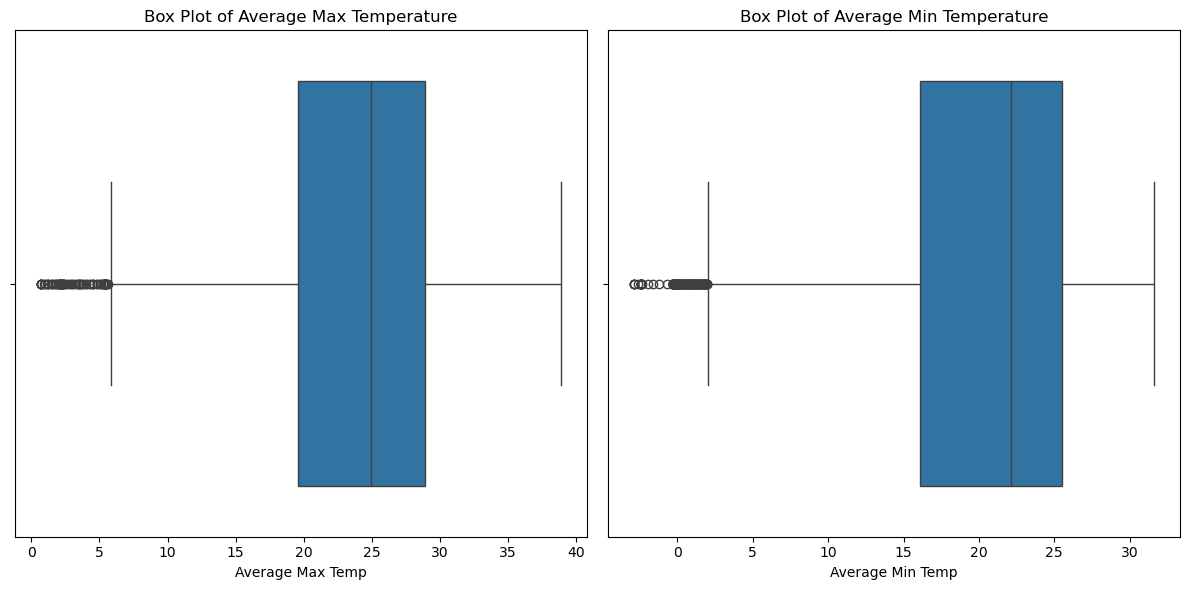

Outliers in Average Max Temp:
             Station                 Hour  Average Max Temp  Average Min Temp  \
122592    Ngong Ping  2024-01-23 10:00:00          5.630435          4.538462   
122593    Ngong Ping  2024-01-23 11:00:00          5.356522          4.280769   
122594    Ngong Ping  2024-01-23 12:00:00          5.082609          4.023077   
122595    Ngong Ping  2024-01-23 13:00:00          4.808696          3.765385   
122596    Ngong Ping  2024-01-23 14:00:00          4.534783          3.507692   
...              ...                  ...               ...               ...   
275177  Tate's Cairn  2024-01-24 06:00:00          1.566667         -0.300000   
275178  Tate's Cairn  2024-01-24 07:00:00          2.300000         -0.300000   
275179  Tate's Cairn  2024-01-24 08:00:00          2.300000         -0.300000   
275180  Tate's Cairn  2024-01-24 09:00:00          2.300000         -0.300000   
275181  Tate's Cairn  2024-01-24 10:00:00          3.600000         -0.300000  

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'averaged_temperature.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_max = data['Average Max Temp'].quantile(0.25)
Q3_max = data['Average Max Temp'].quantile(0.75)
IQR_max = Q3_max - Q1_max

Q1_min = data['Average Min Temp'].quantile(0.25)
Q3_min = data['Average Min Temp'].quantile(0.75)
IQR_min = Q3_min - Q1_min

# Determine outlier bounds
lower_bound_max = Q1_max - 1.5 * IQR_max
upper_bound_max = Q3_max + 1.5 * IQR_max

lower_bound_min = Q1_min - 1.5 * IQR_min
upper_bound_min = Q3_min + 1.5 * IQR_min

# Identify outliers
data['Outlier Max Temp'] = ((data['Average Max Temp'] < lower_bound_max) | 
                             (data['Average Max Temp'] > upper_bound_max))
data['Outlier Min Temp'] = ((data['Average Min Temp'] < lower_bound_min) | 
                             (data['Average Min Temp'] > upper_bound_min))

# Visualize with box plots
plt.figure(figsize=(12, 6))

# Box plot for Average Max Temp
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Average Max Temp'])
plt.title('Box Plot of Average Max Temperature')
plt.xlabel('Average Max Temp')

# Box plot for Average Min Temp
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Average Min Temp'])
plt.title('Box Plot of Average Min Temperature')
plt.xlabel('Average Min Temp')

plt.tight_layout()
plt.show()

# Optionally, print outliers
print("Outliers in Average Max Temp:")
print(data[data['Outlier Max Temp']])

print("\nOutliers in Average Min Temp:")
print(data[data['Outlier Min Temp']])